In [1]:
import numpy as np 
from scipy.integrate import odeint
import os, sys, warnings
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import utility as ut
import surrogate_nn as srnn
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch import nn
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader, TensorDataset
warnings.filterwarnings('ignore')

In [2]:
DTYPE = 'float64'
L63_data_path = '../data/L63-trajectories'
save_folder='../data/rf-start'
log_interval = 100
milestones = [10*2**n for n in range(15)]
learning_rate = 1e-3
drop = 0.7
steps = int(1e4)
save_interval = 100
N = 20000
L0 = 0.4
L1 = 3.5
beta = 4e-5
partition = [100, 100, 100]
train = np.load(f'{L63_data_path}/train.npy').astype(DTYPE)
test = np.load(f'{L63_data_path}/test.npy')[:, :, :1000].astype(DTYPE)

model = srnn.SurrogateModel_NN(3, 300, name='nn', save_folder=save_folder)
model.init_with_rf(L0, L1, beta, train, partition)
# model.learn(train[:, :N], steps, learning_rate, beta, log_interval, save_interval, milestones, drop, batch_size=N-1)

In [3]:
iters = list(range(0, 10000, 100))
# tau = np.zeros(len(iters))
# for i, iter in enumerate(iters):
#     model.net = torch.load(f'{model.save_folder}/nn_{iter}')
#     tau_f_rmse, tau_f_se, rmse, se = model.compute_tau_f(test[:100], error_threshold=0.05)
#     tau[i] = tau_f_se.mean()
#     print(i)

In [9]:
# plt.plot(iters, tau, label="test_model")
# plt.xlabel('iteration (descent step)')
# plt.ylabel(r'mean $\tau_f$')
# plt.legend()
# plt.savefig(f'{model.save_folder}/iter_vs_mean_tau_f.png')

In [11]:
model.init_with_rf(L0, L1, beta, train, partition=[300, 0, 0])
tau_f_rmse, tau_f_se, rmse, se = model.compute_tau_f(test[:100], error_threshold=0.05)
tau_f_1 = tau_f_se.mean()
model.learn(train[:, :N], 1000, 1e-4, drop=1., batch_size='GD')
tau_f_rmse, tau_f_se, rmse, se = model.compute_tau_f(test[:100], error_threshold=0.05)
tau_f_2 = tau_f_se.mean()

tau_f_1 , tau_f_2, tau_f_1 < tau_f_2

Time taken by compute_tau_f is 1.4475 seconds
step: 0    loss: 2.236528     time elapsed=0.0318
step: 100    loss: 2.395607     time elapsed=3.1510
step: 200    loss: 2.254527     time elapsed=6.2691
step: 300    loss: 2.243238     time elapsed=9.3791
step: 400    loss: 2.240326     time elapsed=12.5128
step: 500    loss: 3.731614     time elapsed=15.6269
step: 600    loss: 2.238660     time elapsed=18.7466
step: 700    loss: 71.876223     time elapsed=21.8693
step: 800    loss: 3.516141     time elapsed=24.9902
step: 900    loss: 2.635921     time elapsed=28.1427
Time taken by learn is 31.2358 seconds
Time taken by compute_tau_f is 1.3719 seconds


(5.302752000000001, 1.2437880000000001, False)

In [ ]:
tau_f

In [ ]:
tau_f_se.mean()

In [ ]:
model.net(next(model.dataloader.__iter__())[0])

In [ ]:
train[:N]

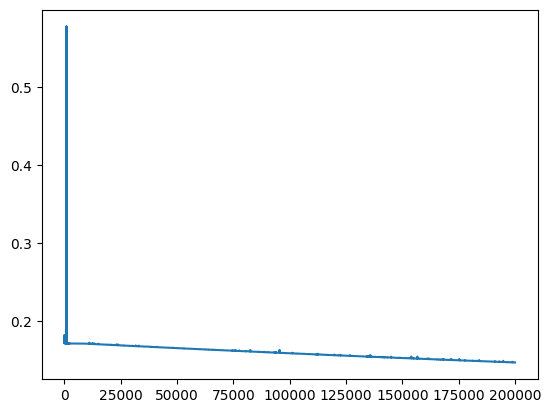

In [8]:
df = pd.read_csv('../data/nn_1_extend_0/train_log.csv')
plt.plot(df['iteration'], df['loss'])

In [15]:
(np.sign(np.array([-3., 4., 5.])) + 1).astype(int) % 2

array([0, 0, 0])

In [16]:
np.array([1., 2.]) @ np.array([3., 4.])

11.0